In [0]:
 import tensorflow as tf
import keras
from keras import regularizers
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Flatten, Dense, Dropout, Activation
from keras.layers import Input
from keras.layers.normalization import BatchNormalization
from keras.models import Model, Sequential
from keras.utils import plot_model
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
X_test = np.load('/content/drive/My Drive/EEG_project/data/X_test.npy')
y_test = np.load('/content/drive/My Drive/EEG_project/data/y_test.npy')
person_train_valid = np.load('/content/drive/My Drive/EEG_project/data/person_train_valid.npy')
X_train_valid = np.load('/content/drive/My Drive/EEG_project/data/X_train_valid.npy')
y_train_valid = np.load('/content/drive/My Drive/EEG_project/data/y_train_valid.npy')
person_test = np.load('/content/drive/My Drive/EEG_project/data/person_test.npy')

In [0]:
print('Taining/Valid data shape: {}'.format(X_train_valid.shape))
print('Test data shape: {}'.format(X_test.shape))
print('Training/Valid target shape: {}'.format(y_train_valid.shape))
print('Test target shape: {}'.format(y_test.shape))
print('Person train/valid shape: {}'.format(person_train_valid.shape))
print('Person test shape: {}'.format(person_test.shape))

Taining/Valid data shape: (2115, 25, 1000)
Test data shape: (443, 25, 1000)
Training/Valid target shape: (2115,)
Test target shape: (443,)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)


In [0]:
X_train = np.zeros((2115, 22, 1000))
X_train = X_train_valid[:,:22,:]
X_train = np.expand_dims(X_train, 3)
print('Taining/Valid data shape: {}'.format(X_train.shape))
xtest = np.zeros((443, 22, 1000))
xtest = X_test[:,:22,:]
xtest = np.expand_dims(xtest, 3)
print('Test data shape: {}'.format(xtest.shape))

Taining/Valid data shape: (2115, 22, 1000, 1)
Test data shape: (443, 22, 1000, 1)


In [0]:
y_train = np.zeros((2115, 4))
y_train[y_train_valid==769, 0] = 1
y_train[y_train_valid==770, 1] = 1
y_train[y_train_valid==771, 2] = 1
y_train[y_train_valid==772, 3] = 1

y_test[y_test==769] = 0
y_test[y_test==770] = 1
y_test[y_test==771] = 2
y_test[y_test==772] = 3

In [0]:
random0 = np.zeros(len(y_train[y_train_valid==769]))
random0[:500] = 1
np.random.shuffle(random0)

random1 = np.zeros(len(y_train[y_train_valid==770]))
random1[:500] = 1
np.random.shuffle(random1)

random2 = np.zeros(len(y_train[y_train_valid==771]))
random2[:500] = 1
np.random.shuffle(random2)

random3 = np.zeros(len(y_train[y_train_valid==772]))
random3[:500] = 1
np.random.shuffle(random3)

X_train_ub = np.zeros((2000, 22, 1000, 1))
y_train_ub = np.zeros((2000, 4))
X_train_ub[:500] = X_train[y_train_valid==769][random0==1]
y_train_ub[:500] = y_train[y_train_valid==769][random0==1]

X_train_ub[500:1000] = X_train[y_train_valid==770][random1==1]
y_train_ub[500:1000] = y_train[y_train_valid==770][random1==1]

X_train_ub[1000:1500] = X_train[y_train_valid==771][random2==1]
y_train_ub[1000:1500] = y_train[y_train_valid==771][random2==1]

X_train_ub[1500:2000] = X_train[y_train_valid==772][random3==1]
y_train_ub[1500:2000] = y_train[y_train_valid==772][random3==1]

random_idx = np.arange(2000)
np.random.shuffle(random_idx)
X_train_ub = X_train_ub[random_idx]
y_train_ub = y_train_ub[random_idx]

In [0]:
def cnn_model():
  model = Sequential()
  
  init = keras.initializers.glorot_normal(seed = 0)
  
  # 1st Part
  model.add(Conv2D(filters = 25, input_shape = (22, 1000, 1), kernel_size = (1, 10), kernel_initializer = init))
  model.add(Conv2D(filters = 25, kernel_size = (22, 1), kernel_initializer = init))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size = (1, 3), strides = 3))
  model.add(Dropout(0.5))
  
  # 2nd Part
  model.add(Conv2D(filters = 50, kernel_size = (1, 10), kernel_initializer = init))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size = (1, 3), strides = 3))
  model.add(Dropout(0.5))
  
  # 3rd Part
  model.add(Conv2D(filters = 100, kernel_size = (1, 10), kernel_initializer = init))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size = (1, 3), strides = 3))
  model.add(Dropout(0.5))
  
  # 4th Part
  model.add(Conv2D(filters = 200, kernel_size = (1, 10), kernel_initializer = init))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size = (1, 3), strides = 3))
  model.add(Dropout(0.5))
  
  # Output
  model.add(Flatten())
  model.add(Dense(units = 4, kernel_initializer = init))
  model.add(BatchNormalization())
  model.add(Activation('softmax'))
  
  model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.adam(lr = 0.0001), metrics = ['accuracy'])
  return model

In [0]:
model = cnn_model()
result = model.fit(X_train_ub, y_train_ub, batch_size = 16, validation_split = 0.2, epochs = 500)

Train on 1600 samples, validate on 400 samples
Epoch 1/500
1600/1600 [==============================] - 4s 3ms/step - loss: 1.7131 - acc: 0.2544 - val_loss: 1.4323 - val_acc: 0.2525
Epoch 2/500
1600/1600 [==============================] - 2s 2ms/step - loss: 1.6899 - acc: 0.2537 - val_loss: 1.4615 - val_acc: 0.2275
Epoch 3/500
1600/1600 [==============================] - 2s 1ms/step - loss: 1.6516 - acc: 0.2500 - val_loss: 1.4939 - val_acc: 0.2275
Epoch 4/500
1600/1600 [==============================] - 2s 1ms/step - loss: 1.5162 - acc: 0.2644 - val_loss: 1.4286 - val_acc: 0.2275
Epoch 5/500
1600/1600 [==============================] - 2s 1ms/step - loss: 1.4460 - acc: 0.2850 - val_loss: 1.3939 - val_acc: 0.2725
Epoch 6/500
1600/1600 [==============================] - 2s 1ms/step - loss: 1.4202 - acc: 0.2744 - val_loss: 1.3870 - val_acc: 0.2600
Epoch 7/500
1600/1600 [==============================] - 2s 1ms/step - loss: 1.4132 - acc: 0.2694 - val_loss: 1.3848 - val_acc: 0.2625
Epoch 8/

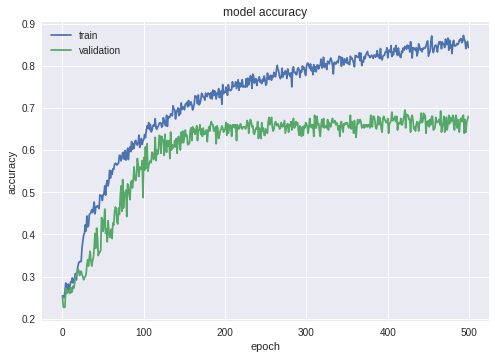

In [0]:
results = []
results.append(result.history['val_acc'])

plt.plot(result.history['acc'])
plt.plot(result.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [0]:
test_results = model.predict(x = xtest, batch_size = 16)
categ_results = np.argmax(test_results, axis = 1)
test_acc = np.sum(categ_results==y_test) / len(categ_results)
print('Training Accuracy: %.3f' % result.history['acc'][-1])
print('Validation Accuracy: %.3f' % result.history['val_acc'][-1])
print('Testing Accuracy: %.3f' % test_acc)

Training Accuracy: 0.843
Validation Accuracy: 0.680
Testing Accuracy: 0.673
